In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
IMG_SIZE=224
BATCH_SIZE=64

In [23]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [24]:
train_generator=train_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/train",
target_size=(IMG_SIZE,IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='training'
)

Found 9619 images belonging to 4 classes.


In [25]:
val_generator=train_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/train",
target_size=(IMG_SIZE,IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='validation'
)

Found 2403 images belonging to 4 classes.


In [26]:
class_indices=train_generator.class_indices
class_names=list(class_indices.keys())
print("class indices",class_indices)
print("class name:",class_names)

class indices {'Closed_Eyes': 0, 'Open_Eyes': 1, 'Yawn': 2, 'no_yawn': 3}
class name: ['Closed_Eyes', 'Open_Eyes', 'Yawn', 'no_yawn']


In [27]:
model=keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 672s 4s/step - accuracy: 0.9392 - loss: 0.1875 - val_accuracy: 0.7079 - val_loss: 1.0020
Epoch 2/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 684s 5s/step - accuracy: 0.9666 - loss: 0.1072 - val_accuracy: 0.7457 - val_loss: 0.9333
Epoch 3/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 681s 5s/step - accuracy: 0.9742 - loss: 0.0763 - val_accuracy: 0.7524 - val_loss: 1.5221
Epoch 4/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 669s 4s/step - accuracy: 0.9775 - loss: 0.0695 - val_accuracy: 0.7212 - val_loss: 2.2683
Epoch 5/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 672s 4s/step - accuracy: 0.9874 - loss: 0.0440 - val_accuracy: 0.7624 - val_loss: 1.5742


In [32]:
model.save('/content/drive/MyDrive/Colab Notebooks/webcame.h5')

In [34]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/Colab Notebooks/webcame.h5')
print("Model Loaded")

Model Loaded


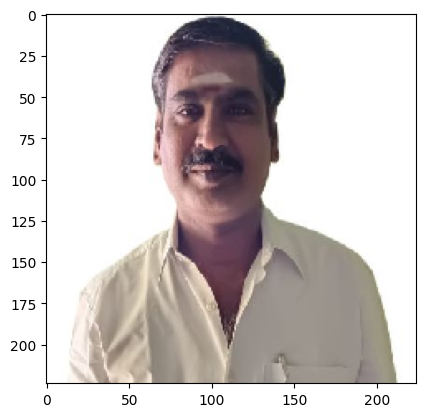

In [40]:
test_image_path="/content/WhatsApp Image 2025-11-17 at 18.51.25_ec98cd46.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [41]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255.0

In [42]:
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[5.8896204e-13 9.9979883e-01 1.9600327e-04 5.0893559e-06]]


In [43]:
prediction=model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Open_Eyes
